# 1119007-Timothy Ray
# 1119023-Jedediah Fanuel
# 1119033-Fedly Septian
# 1119038-Elangel Neilea Shaday

# Histogram perataan

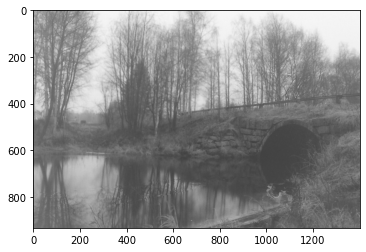

In [30]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('grayscale.png')

# tampilkan citra asal
plt.imshow(img, cmap='gray')

(array([159210., 914883., 986025., 572229., 393879., 310302., 257388.,
        324684.]),
 array([ 48.   ,  73.125,  98.25 , 123.375, 148.5  , 173.625, 198.75 ,
        223.875, 249.   ]),
 <BarContainer object of 8 artists>)

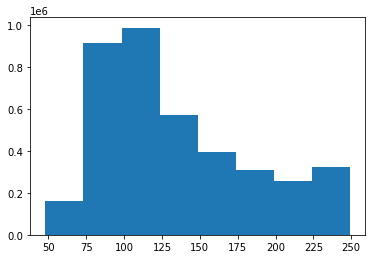

In [70]:
# ubah citra menjadi array
img = np.asarray(img)

# mengubah array 2D menjadi 1D
flat = img.flatten()

## Nilai yang ada pada array flat adalah nilai intensitas ( dari 0 [hitam] ~ 255 [putih] )

# kita plot histogram citra asal
plt.hist(flat, bins=8)

In [32]:
# fungsi histogram
def get_histogram(image, bins):
    # array seukuran bin hitogram dan diisikan dengan nilai nol
    histogram = np.zeros(bins)
    
    # loop menelusuri pixel dan jumlahkan jumlah pixel
    for pixel in image:
        histogram[pixel] += 1
    
    # return hasil akhir
    return histogram

# kita panggil fungsi histogram kita
hist = get_histogram(flat, 256)

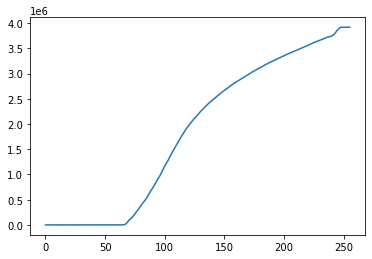

In [33]:
# buat fungsi cumulative sum (kalau di kelas disebut Sk)
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# eksekusi fungsi
cs = cumsum(hist)

# tampilkan hasilnya
plt.plot(cs)

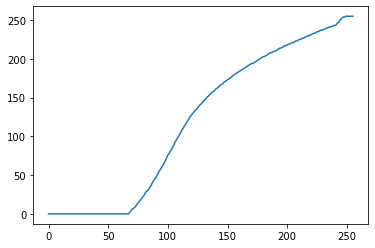

In [34]:
# pembilang & penyebut
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# normalisasi jumlah kumulatif
cs = nj / N

# mengubahnya kembali ke tipe uint8 karena tidak dapat menggunakan nilai floating point dalam citra
cs = cs.astype('uint8')

plt.plot(cs)

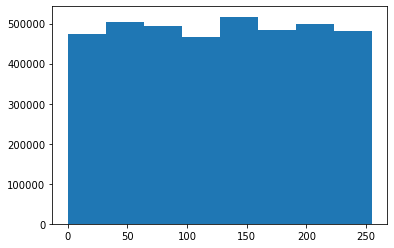

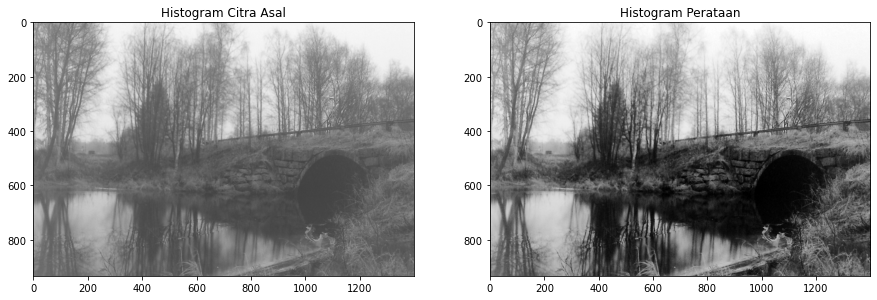

In [69]:
# dapatkan nilai dari jumlah kumulatif untuk setiap indeks di flat ke variable baru
img_new = cs[flat]

# kita plot histogram perataan
plt.hist(img_new, bins=8)

# kembalikan array 1D ke bentuk mula-mula citra
img_new = np.reshape(img_new, img.shape)

# mengatur citra agar bersebelahan
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Histogram Citra Asal')

# tampilkan citra baru
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')
plt.title('Histogram Perataan')

plt.show(block=True)

# Konvolusi (Deteksi Tepi)

In [36]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

In [37]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array, name1, name2):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(name1)
    ax[1].imshow(img2, cmap='gray');
    ax[1].set_title(name2)

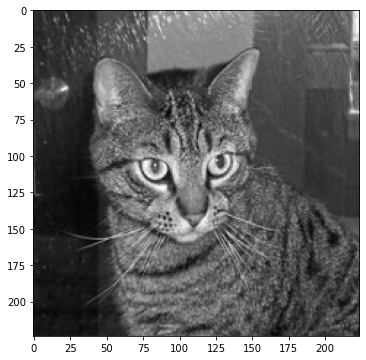

In [38]:
cat = Image.open('1.jpeg')
cat = ImageOps.grayscale(cat)
cat = cat.resize(size=(224, 224))
plot_image(img=cat)

In [39]:
edgesV = np.array([
    [-1, -2, -1],
    [0,  0, 0],
    [1, 2, 1]
])

edgesH = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

noise_mean = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])


In [40]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [41]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

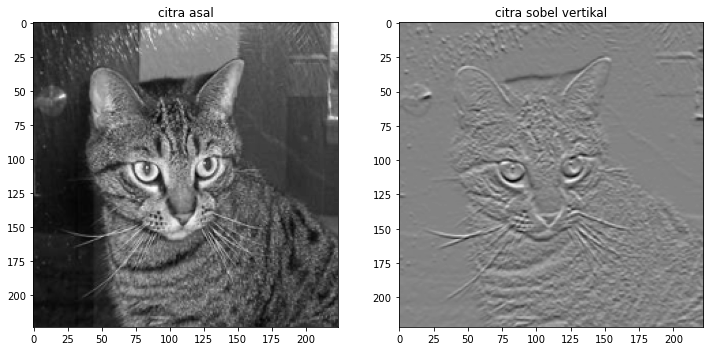

In [42]:
cat_outlinedV = convolve(img=np.array(cat), kernel=edgesV)
plot_two_images(
    img1=cat, 
    img2=cat_outlinedV,
    name1='citra asal',
    name2='citra sobel vertikal'
)

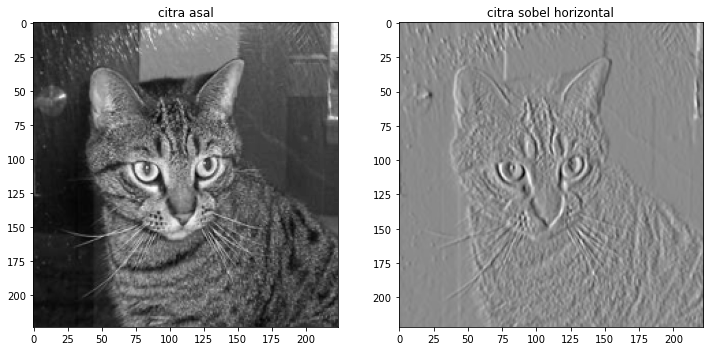

In [43]:
cat_outlinedH = convolve(img=np.array(cat), kernel=edgesH)
plot_two_images(
    img1=cat, 
    img2=cat_outlinedH,
    name1='citra asal',
    name2='citra sobel horizontal'
)

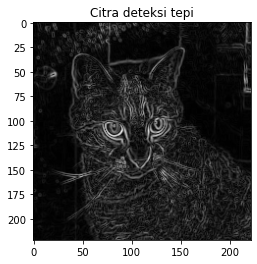

In [44]:
# Gabungkan sobel vertical & sobel horizontal
gradient_magnitude = np.sqrt(np.square(cat_outlinedH) + np.square(cat_outlinedV))
gradient_magnitude_unnormalize = gradient_magnitude
 

plt.imshow(gradient_magnitude_unnormalize, cmap='gray')
plt.title("Citra deteksi tepi")
plt.show()

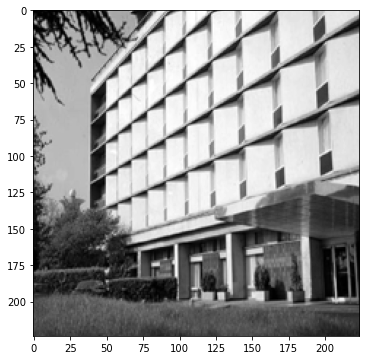

In [64]:
building = Image.open('rumahjedi.jpeg')
building = ImageOps.grayscale(building)
building = building.resize(size=(224, 224))
plot_image(img=building)

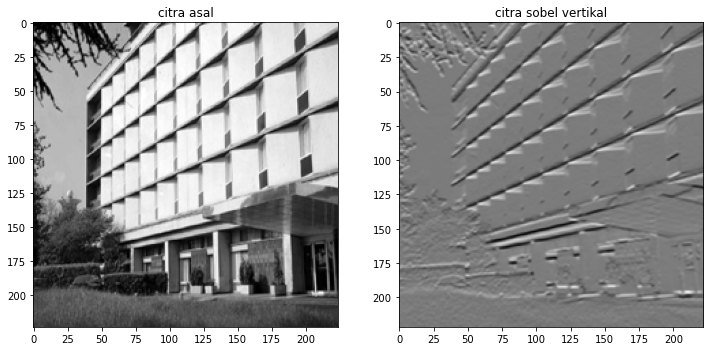

In [65]:
building_outlinedV = convolve(img=np.array(building), kernel=edgesV)
plot_two_images(
    img1=building, 
    img2=building_outlinedV,
    name1='citra asal',
    name2='citra sobel vertikal'
)

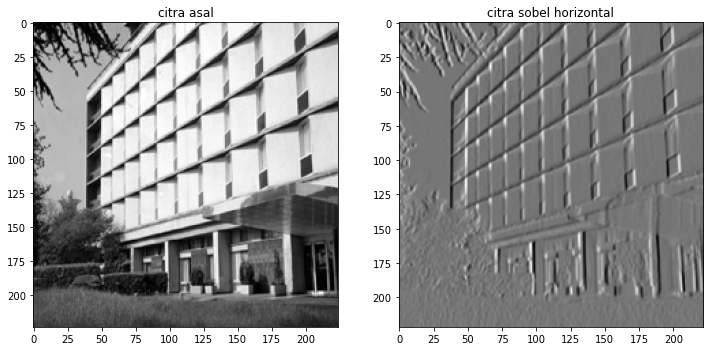

In [66]:
building_outlinedH = convolve(img=np.array(building), kernel=edgesH)
plot_two_images(
    img1=building, 
    img2=building_outlinedH,
    name1='citra asal',
    name2='citra sobel horizontal'
)

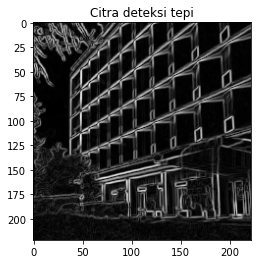

In [67]:
# Gabungkan sobel vertical & sobel horizontal
gradient_magnitude = np.sqrt(np.square(building_outlinedH) + np.square(building_outlinedV))
gradient_magnitude_unnormalize = gradient_magnitude
 
plt.imshow(gradient_magnitude_unnormalize, cmap='gray')
plt.title("Citra deteksi tepi")
plt.show()

# Konvolusi (Noise)

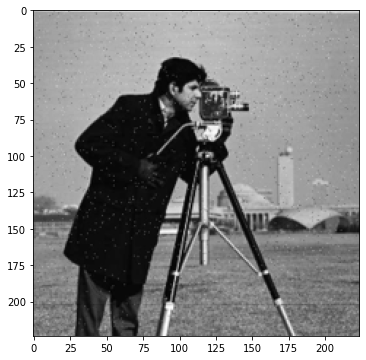

In [49]:
cameraman = Image.open('cameraman.jpeg')
cameraman = ImageOps.grayscale(cameraman)
cameraman = cameraman.resize(size=(224, 224))
plot_image(img=cameraman)

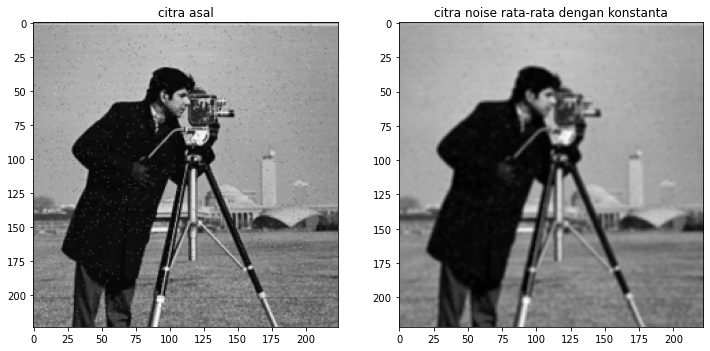

In [50]:
meanF1 = convolve(img=np.array(cameraman), kernel=noise_mean)
plot_two_images(
    img1=cameraman, 
    img2=meanF1,
    name1='citra asal',
    name2='citra noise rata-rata dengan konstanta'
)

## Median Filter

In [51]:
def get_median(filter_area):
    res = np.median(filter_area)
    return res


def median_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            image[row][column] = get_median(filter_area)

    return image


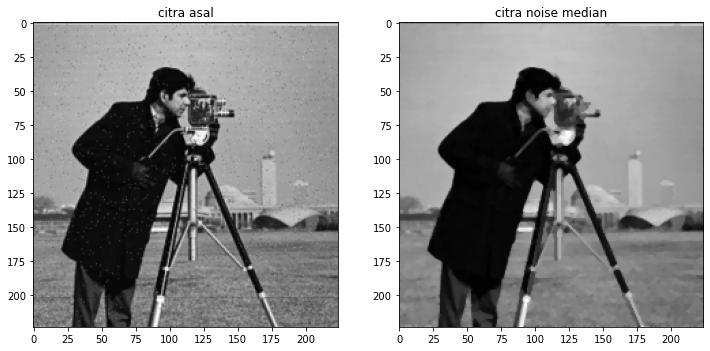

In [52]:
cameraman_arr = np.array(cameraman)
medianF = median_filter(cameraman_arr,222,222)
# plot_image(medianF)
plot_two_images(
    img1=cameraman, 
    img2=medianF,
    name1='citra asal',
    name2='citra noise median'
)

## Mean Filter

In [53]:
def get_kernel():
    return np.ones((3, 3), np.float32) / 9

def get_mean_with_kernel(filter_area, kernel):
    # Fastest solution to multiply the matrices and get the result.
    return np.sum(np.multiply(kernel, filter_area))

def mean_filter(image, height, width):
    # Set the kernel.
    kernel = get_kernel()

    for row in range(1, height + 1):
        for column in range(1, width + 1):
            # Get the area to be filtered with range indexing.
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            res = get_mean_with_kernel(filter_area, kernel)
            image[row][column] = res

    return image

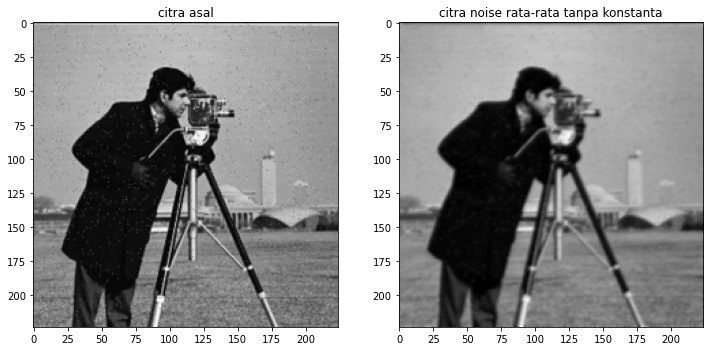

In [54]:
cameraman_arr = np.array(cameraman)
meanF2 = mean_filter(cameraman_arr,222,222)
plot_two_images(
    img1=cameraman, 
    img2=meanF2,
    name1='citra asal',
    name2='citra noise rata-rata tanpa konstanta'
)

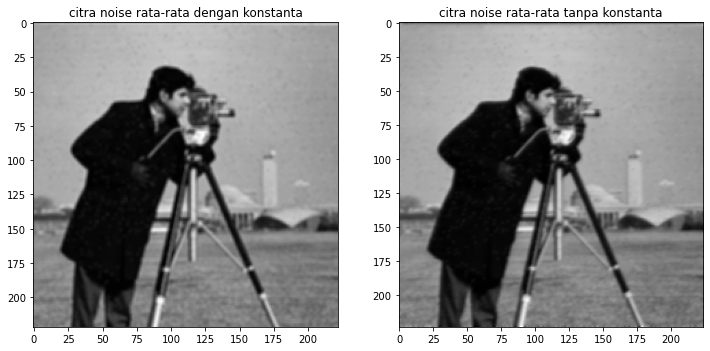

In [55]:
plot_two_images(
    img1=meanF1, 
    img2=meanF2,
    name1='citra noise rata-rata dengan konstanta',
    name2='citra noise rata-rata tanpa konstanta'
)

## Median Mean Balance

In [56]:
BALANCE_ALPHA = 0.2
def mean_median_balanced_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            mean_filter_vector = get_mean_with_kernel(filter_area, get_kernel())
            median_filter_vector = get_median(filter_area)
            image[row][column] = BALANCE_ALPHA * mean_filter_vector + (1 - BALANCE_ALPHA) * median_filter_vector
    return image

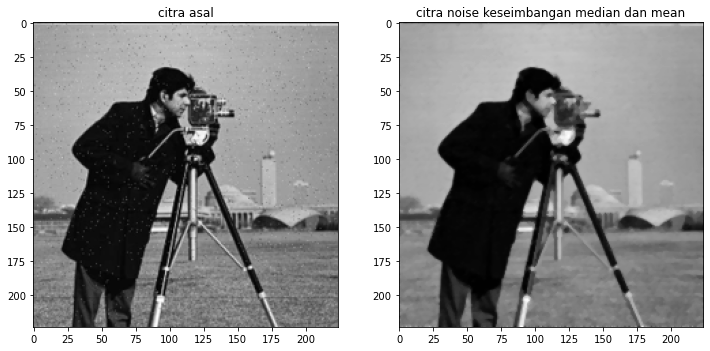

In [57]:
cameraman_arr = np.array(cameraman)
mean_median_balanced = mean_median_balanced_filter(cameraman_arr,222,222)
plot_two_images(
    img1=cameraman, 
    img2=mean_median_balanced,
    name1='citra asal',
    name2='citra noise keseimbangan median dan mean'
)